**Table of contents**<a id='toc0_'></a>    
1. [pytest入门](#toc1_)    
1.1. [这是一个会通过测试用例](#toc1_1_)    
1.1.1. [pytest test_one.py](#toc1_1_1_)    
1.1.2. [ pytest -v test_one.py](#toc1_1_2_)    
1.2. [这是一个会失败的测试用例](#toc1_2_)    
1.2.1. [使用-v 查看详细的报错内容](#toc1_2_1_)    
1.3. [运行pytest](#toc1_3_)    
1.3.1. [如果你不提供任何参数，pytest会在当前目录以及子目录寻找测试文件，然后运行搜索到的测试代码。（pytest会递归遍历每个目录及子目录）](#toc1_3_1_)    
1.3.2. [pytest 不指定目录和文件 会查找test_开头或者_test结尾的测试函数。](#toc1_3_2_)    
1.3.3. [pytest指定目录和文件](#toc1_3_3_)    
1.3.4. [测试搜索命名规则 (可以修改测试搜索默认规则，见第六章)](#toc1_3_4_)    
1.3.5. [控制台输出信息介绍](#toc1_3_5_)    
1.3.6. [测试函数返回结果类型](#toc1_3_6_)    
1.4. [运行单个测试用例](#toc1_4_)    
1.5. [使用命令行选项](#toc1_5_)    
1.5.1. [pytest --help](#toc1_5_1_)    
1.5.2. [--collect-only：](#toc1_5_2_)    
1.5.3. [-k EXPRESSION ：允许使用表达式指定希望运行的测试用例。](#toc1_5_3_)    
1.5.4. [-m MARKEXPR :用于标记测试并分组，以便快速选中并运行。](#toc1_5_4_)    
1.5.5. [-x 遇到失败立刻停止整个会话。](#toc1_5_5_)    
1.5.6. [--maxfail=num  ：可以指定失败几次](#toc1_5_6_)    
1.5.7. [-s : --capture=no的快捷方式](#toc1_5_7_)    
1.5.8. [--capture=method](#toc1_5_8_)    
1.5.9. [-l :测试失败会打印局部变量名和他们的值](#toc1_5_9_)    
1.5.10. [--lf, --last-failed :重新运行最后一个失败的测试用例。](#toc1_5_10_)    
1.5.11. [--ff, --failed-first :首先运行前一轮失败的用例。](#toc1_5_11_)    
1.5.12. [-v : 输出详细信息](#toc1_5_12_)    
1.5.13. [-q : 简化输出信息](#toc1_5_13_)    
1.5.14. [--tb=style ：决定捕捉到失败时输出信息的显示方式。pytest列举错误信息的这一过程称之为“信息回溯”](#toc1_5_14_)    
1.5.15. [--durations=N : 统计测试过程中哪几个阶段时最慢的（包含每个测试用例的call、setup、teardown过程）](#toc1_5_15_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[pytest入门](#toc0_)

## 1.1. <a id='toc1_1_'></a>[这是一个会通过测试用例](#toc0_)

In [1]:
import ipytest
ipytest.autoconfig()

In [ ]:
%%ipytest -v 
# %%writefile ./tests/withpytest/test_one.py

def test_passing():  # sourcery skip: equality-identity, remove-assert-true
    assert (1, 2, 3) == (1, 2, 3)

打开终端执行一下命令

### 1.1.1. <a id='toc1_1_1_'></a>[pytest test_one.py](#toc0_)

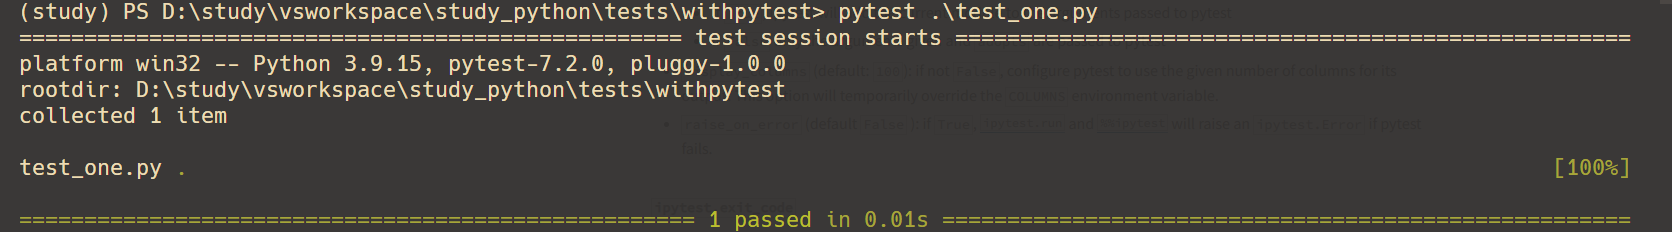

点. 表示：运行了一个测试用例，且通过，如果想查看详情可以加上-v 或者--verbose选项。
### 1.1.2. <a id='toc1_1_2_'></a>[ pytest -v test_one.py](#toc0_)

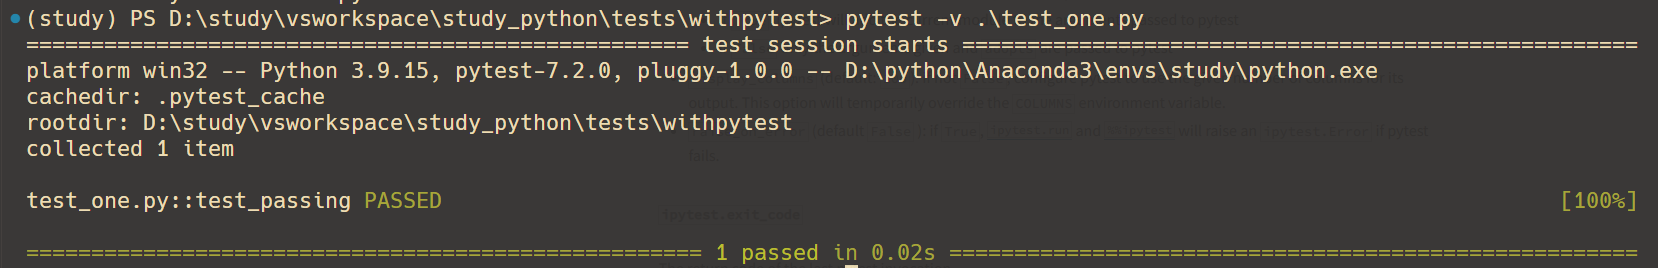

## 1.2. <a id='toc1_2_'></a>[这是一个会失败的测试用例](#toc0_)

In [ ]:
%%ipytest -v
# %%writefile ./tests/withpytest/test_two.py

def test_failing():  # sourcery skip: equality-identity, remove-assert-true
    assert (1, 2, 3) == (3, 2, 1)

### 1.2.1. <a id='toc1_2_1_'></a>[使用-v 查看详细的报错内容](#toc0_)

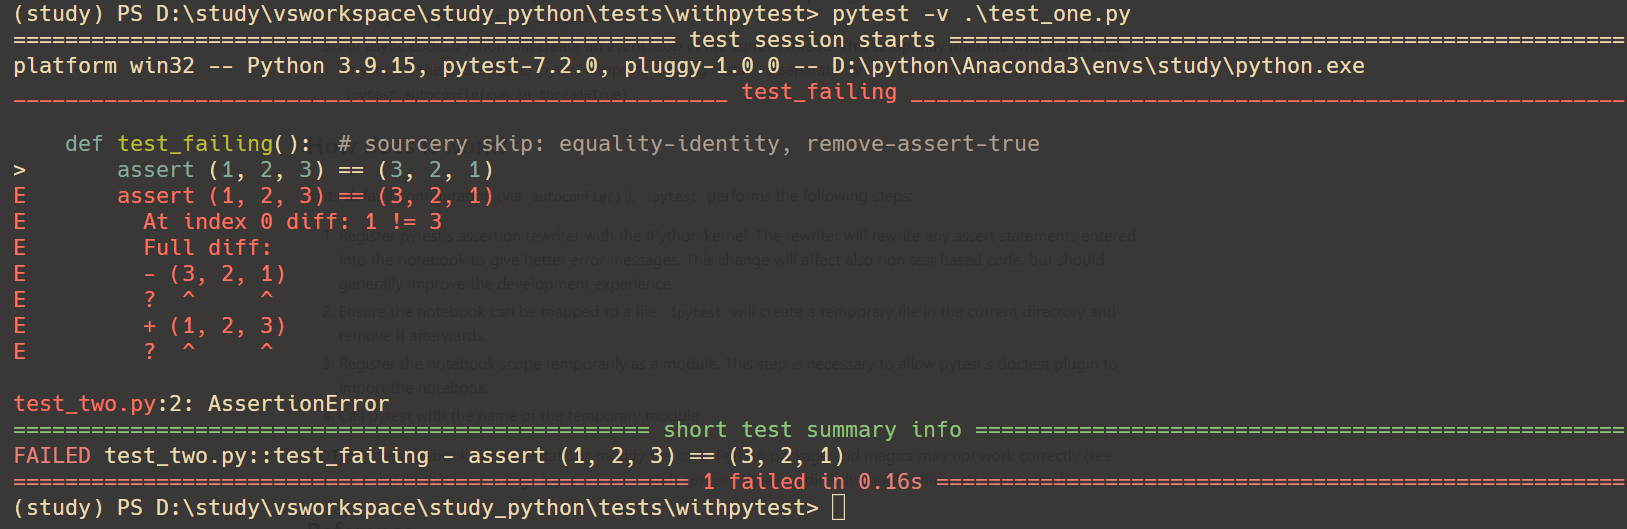

## 1.3. <a id='toc1_3_'></a>[运行pytest](#toc0_)

- pytest --help

### 1.3.1. <a id='toc1_3_1_'></a>[如果你不提供任何参数，pytest会在当前目录以及子目录寻找测试文件，然后运行搜索到的测试代码。（pytest会递归遍历每个目录及子目录）](#toc0_)

举个例子：创建一个tasks目录，并且创建一下测试文件。

In [11]:
%%writefile ./tests/withpytest/tasks/test_three.py
from collections import namedtuple

Task = namedtuple("Task", ["summary", "owner", "done", "id"])
Task.__new__.__defaults__ = (None, None, False, None)


def test_default():
    """Using no parameters should invoke defaults."""
    t1 = Task()
    t2 = Task(None, None, False, None)
    assert t1 == t2


def test_member_access():
    """Check .field functionality of namedtuple."""
    t = Task("buy milk", "brian")
    assert t.summary == "buy milk"
    assert t.owner == "brian"
    assert (t.done, t.id) == (False, None)


Writing ./tests/withpytest/tasks/test_three.py


In [12]:
%%writefile ./tests/withpytest/tasks/test_four.py
from collections import namedtuple

Task = namedtuple("Task", ["summary", "owner", "done", "id"])
Task.__new__.__defaults__ = (None, None, False, None)


def test_asdict():
    """_asdict() should return a dictionary."""
    t1 = Task("do something", "okken", True, 21)
    d1 = t1._asdict()
    expected = {"summary": "do something", "owner": "okken", "done": True, "id": 21}
    assert d1 == expected


def test_relace():
    """replace() should change passed in fields."""
    t_before = Task("finish book", "brian", True)
    t_after = t_before._replace(done=False, id=10)
    expected = {"summary": "finish book", "owner": "brian", "done": False, "id": 10}
    assert t_after == expected

Writing ./tests/withpytest/tasks/test_four.py


### 1.3.2. <a id='toc1_3_2_'></a>[pytest 不指定目录和文件 会查找test_开头或者_test结尾的测试函数。](#toc0_)

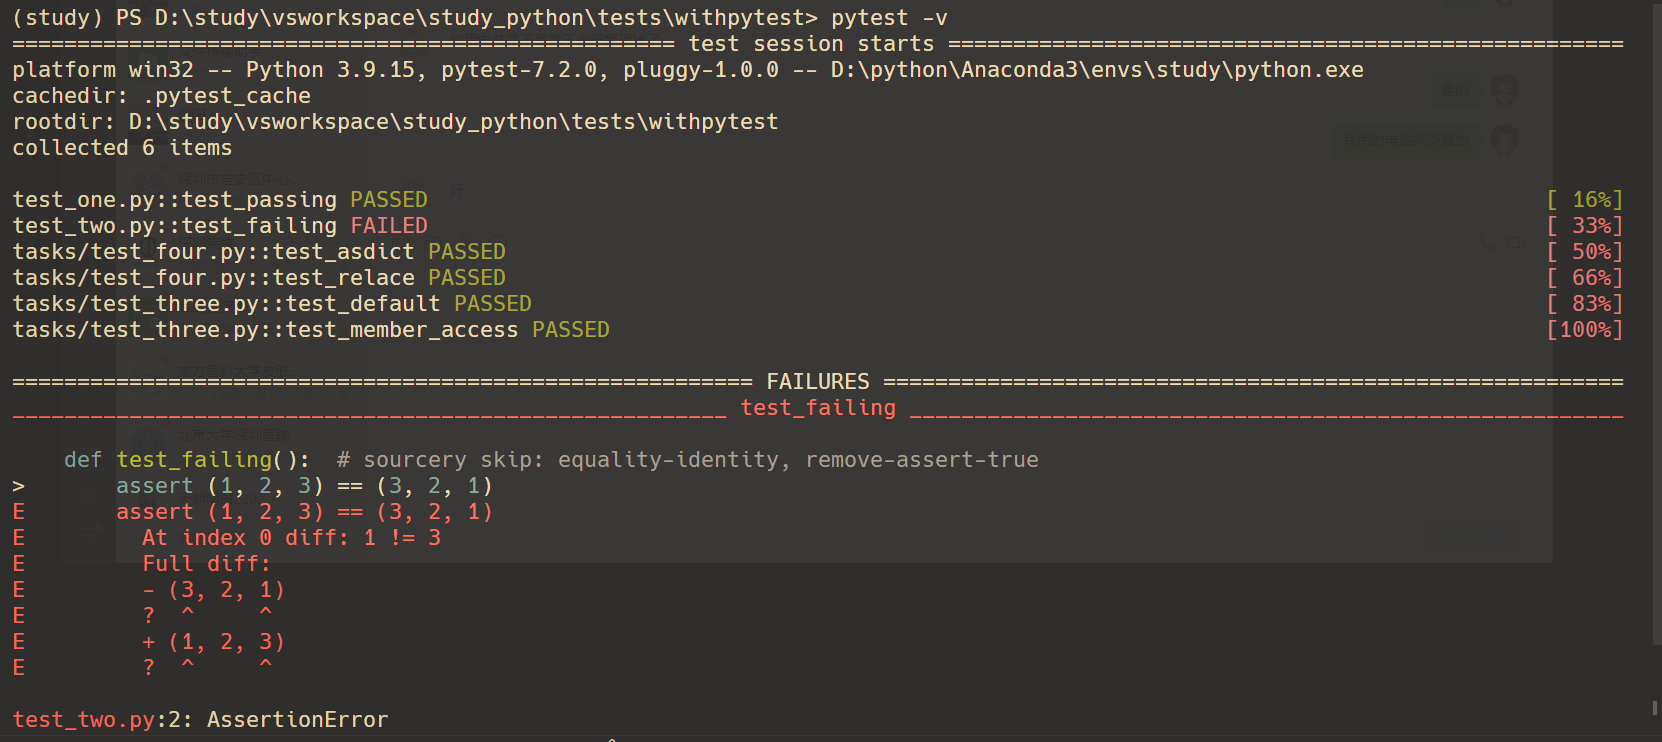

### 1.3.3. <a id='toc1_3_3_'></a>[pytest指定目录和文件](#toc0_)
- pytest ./tasks/test_three.py ./tasks/test_four.py

pytest搜索测试文件和测试用例的过程称为测试搜索(test discovery)。只要遵守pytest的命名规则，pytest就能自动搜索所有待执行的测试用例。以下是几条主要的命名规则。

### 1.3.4. <a id='toc1_3_4_'></a>[测试搜索命名规则 (可以修改测试搜索默认规则，见第六章)](#toc0_)
- 测试文件应当命名为 test_\<something>.py 或者 \<something>_test.py。
- 测试函数、测试类方法应当命名为test_\<something>。
- 测试类应当命名为TEST\<something>。

### 1.3.5. <a id='toc1_3_5_'></a>[控制台输出信息介绍](#toc0_)


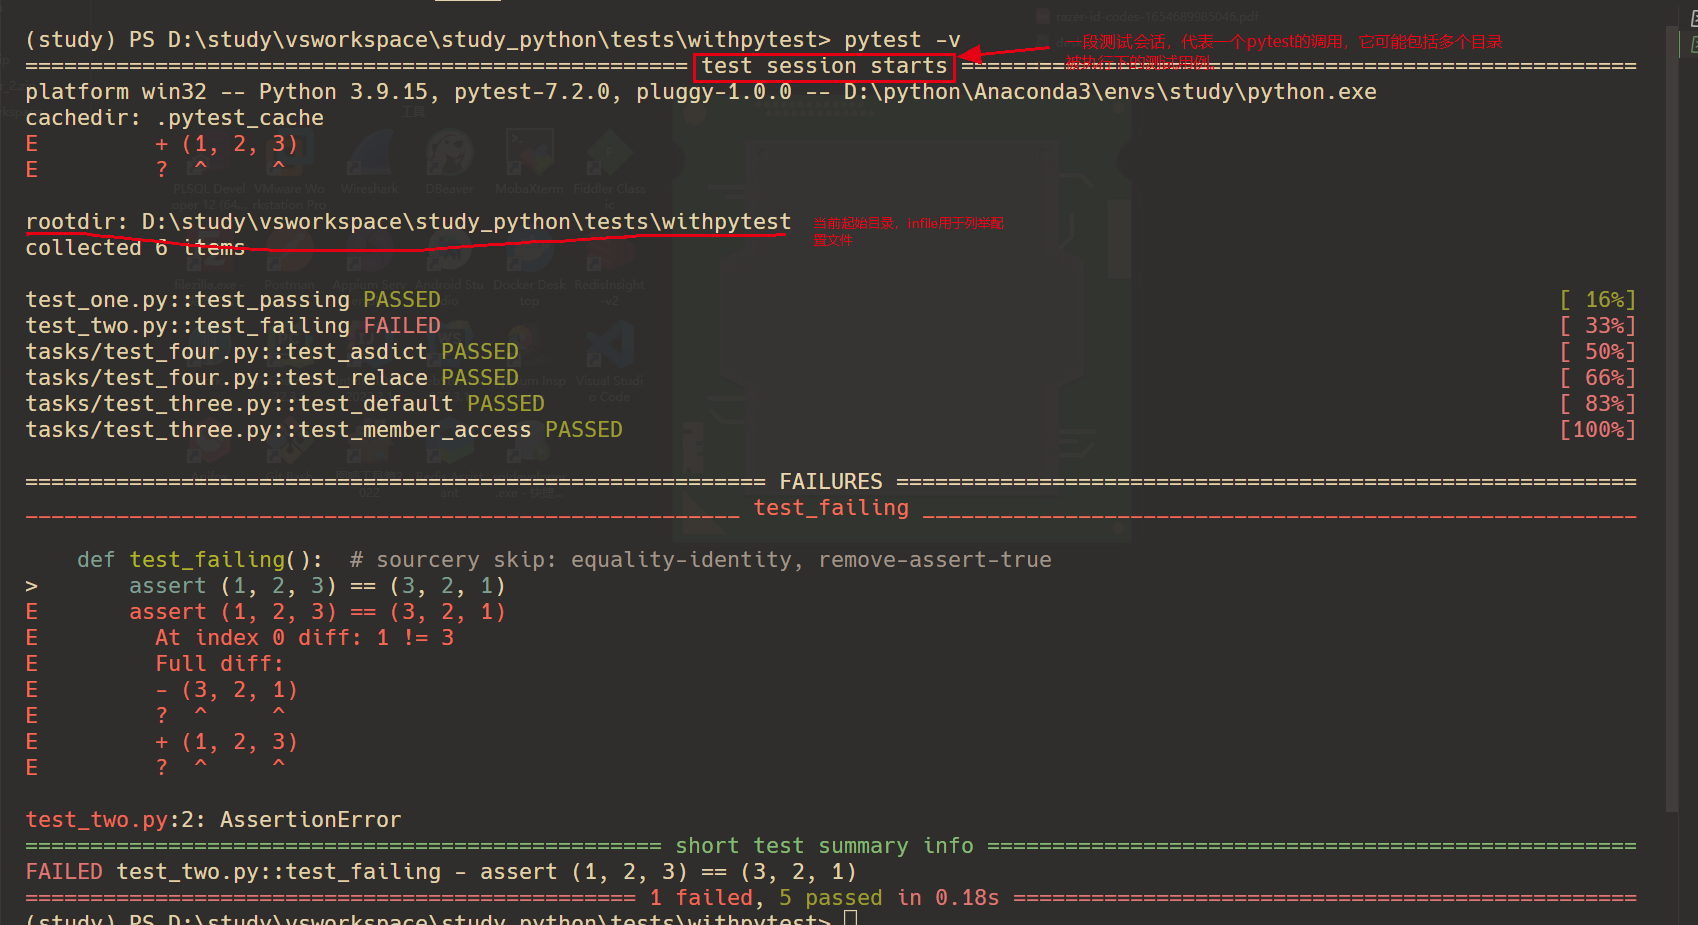

### 1.3.6. <a id='toc1_3_6_'></a>[测试函数返回结果类型](#toc0_)
以下是测试功能的可能结果：

- PASSED (.)：测试成功。
- FAILED (F):测试失败(或XPASS + strict导致冲突失败)。
- SKIPPED (s): 测试被跳过。 你可以使用@pytest.mark.skip()或 pytest.mark.skipif()修饰器告诉pytest跳过测试
- xfail (x)：预期测试失败。@pytest.mark.xfail()
- XPASS (X)：测试不应该通过。
- ERROR (E): 测试用例之外的代码触发了异常，可能由fixture引起，或者hook函数引起。

## 1.4. <a id='toc1_4_'></a>[运行单个测试用例](#toc0_)
指定文件后面添加::test_name
- pytest ./tasks/test_four.py::test_asdict

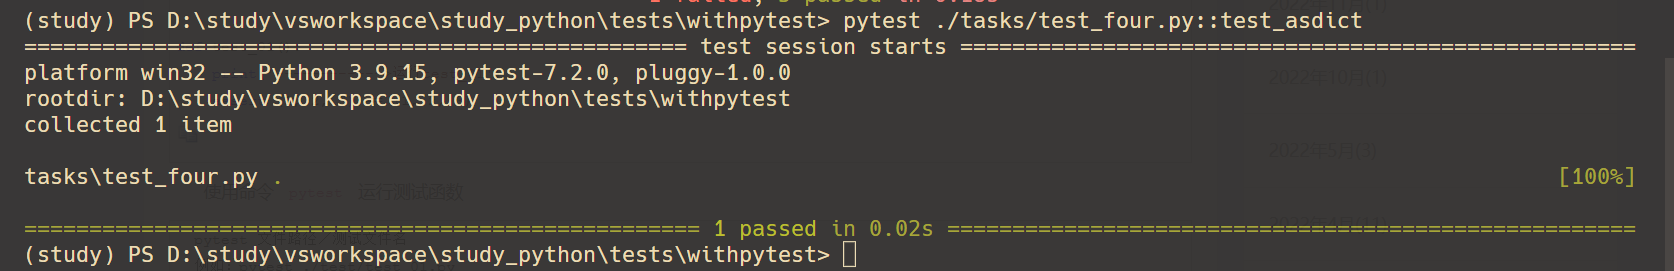

## 1.5. <a id='toc1_5_'></a>[使用命令行选项](#toc0_)
### 1.5.1. <a id='toc1_5_1_'></a>[pytest --help](#toc0_)

### 1.5.2. <a id='toc1_5_2_'></a>[--collect-only：](#toc0_)
--collect-only, --co  Only collect tests, don't execute them


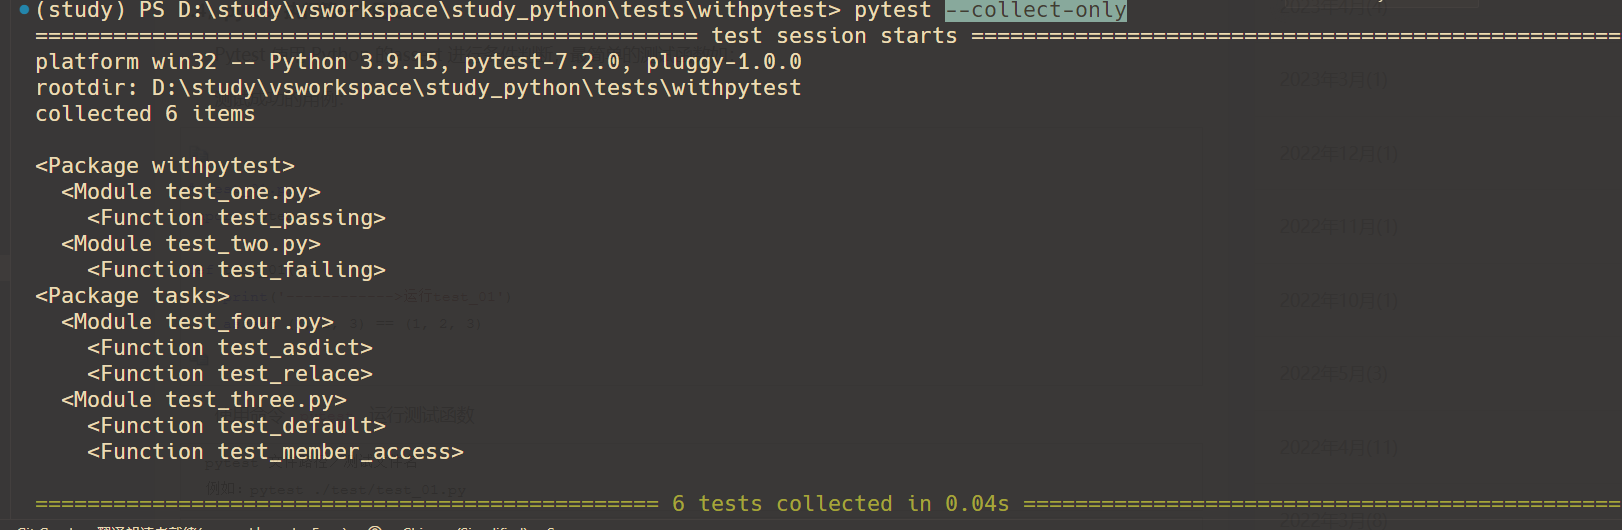

### 1.5.3. <a id='toc1_5_3_'></a>[-k EXPRESSION ：允许使用表达式指定希望运行的测试用例。](#toc0_)
例如： pytest -k "asdict or defaults" --collect-only 先验证下是否收集到想要的用例。再执行。pytest -v -k  "asdict or defaults"

### 1.5.4. <a id='toc1_5_4_'></a>[-m MARKEXPR :用于标记测试并分组，以便快速选中并运行。](#toc0_)
Only run tests matching given mark expression. For example: -m 'mark1 and not mark2'.

### 1.5.5. <a id='toc1_5_5_'></a>[-x 遇到失败立刻停止整个会话。](#toc0_)
-x, --exitfirst       Exit instantly on first error or failed test

例如：pytest -x  否则会全部执行 pytest --tb=no (不打印错误信息)

### 1.5.6. <a id='toc1_5_6_'></a>[--maxfail=num  ：可以指定失败几次](#toc0_)
--maxfail=num         Exit after first num failures or errors

例如：
- pytest --maxfail=1 --tb=no 
- pytest --maxfail=2 --tb=no

### 1.5.7. <a id='toc1_5_7_'></a>[-s : --capture=no的快捷方式](#toc0_)
-s                    Shortcut for --capture=no

### 1.5.8. <a id='toc1_5_8_'></a>[--capture=method](#toc0_)
--capture=method      Per-test capturing method: one of fd|sys|no|tee-sys

- pytest -s                  # disable all capturing
- pytest --capture=sys       # replace sys.stdout/stderr with in-mem files
- pytest --capture=fd        # also point filedescriptors 1 and 2 to temp file
- pytest --capture=tee-sys   # combines 'sys' and '-s', capturing sys.stdout/stderr
                           # and passing it along to the actual sys.stdout/stderr

### 1.5.9. <a id='toc1_5_9_'></a>[-l :测试失败会打印局部变量名和他们的值](#toc0_)
- pytest --showlocals # show local variables in tracebacks
- pytest -l           # show local variables (shortcut)

### 1.5.10. <a id='toc1_5_10_'></a>[--lf, --last-failed :重新运行最后一个失败的测试用例。](#toc0_)
--lf, --last-failed   Rerun only the tests that failed at the last run (or all if none failed)

### 1.5.11. <a id='toc1_5_11_'></a>[--ff, --failed-first :首先运行前一轮失败的用例。](#toc0_)
--ff, --failed-first  Run all tests, but run the last failures first. This may re-order tests and thus lead to repeated    
                        fixture setup/teardown.

### 1.5.12. <a id='toc1_5_12_'></a>[-v : 输出详细信息](#toc0_)
-v, --verbose         Increase verbosity

### 1.5.13. <a id='toc1_5_13_'></a>[-q : 简化输出信息](#toc0_)
-q, --quiet           Decrease verbosity

### 1.5.14. <a id='toc1_5_14_'></a>[--tb=style ：决定捕捉到失败时输出信息的显示方式。pytest列举错误信息的这一过程称之为“信息回溯”](#toc0_)
--tb=style            Traceback print mode (auto/long/short/line/native/no)

### 1.5.15. <a id='toc1_5_15_'></a>[--durations=N : 统计测试过程中哪几个阶段时最慢的（包含每个测试用例的call、setup、teardown过程）](#toc0_)
--durations=N         Show N slowest setup/test durations (N=0 for all)